## 导数，梯度，边缘信息 
### 导数
$Gx=\frac{\delta G}{\delta x}$
|Gxy|是梯度向量的大小
<Gxy是梯度向量的方向

角度值好像需要根据向量所在象限不同适当+pi或者-pi。

梯度向量大小就包含了x方向和y方向的边缘信息。

### 图像导数
图像矩阵是离散的，所以用差分，就是用相邻两个数的差来表示变化率。
向后差分：
x方向的差分：Gx(n,y) = G(n,y)-G(n-1,y)
y方向的差分：Gy(x,n) = G(x,n)-G(x,n-1)
#### 算子
实际计算图像导数时，我们是通过原图像和一个**算子**进行卷积来完成的(这种方法是求图像的近似导数)。
- Prewitt算子 ：
$\begin{matrix}
     -1 & 0 & 1 \\
     -1 & 0 & 1 \\
     -1 & 0 & 1 \\
\end{matrix}$

In [2]:
import numpy as np
from PIL import Image

def imconv(image_array,suanzi):
    '''计算卷积
        参数
        image_array 原灰度图像矩阵
        suanzi      算子
        返回
        原图像与算子卷积后的结果矩阵
    '''
    image = image_array.copy()     # 原图像矩阵的深拷贝
    
    dim1,dim2 = image.shape

    # 对每个元素与算子进行乘积再求和(忽略最外圈边框像素)
    for i in range(1,dim1-1):
        for j in range(1,dim2-1):
            image[i,j] = (image_array[(i-1):(i+2),(j-1):(j+2)]*suanzi).sum()
    
    # 由于卷积后灰度值不一定在0-255之间，统一化成0-255
    image = image*(255.0/image.max())

    # 返回结果矩阵
    return image

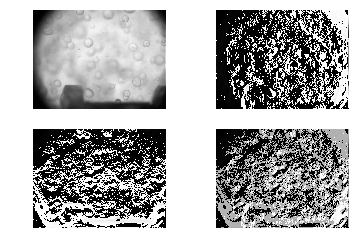

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# x方向的Prewitt算子
suanzi_x = np.array([[-1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])
# y方向的Prewitt算子
suanzi_y = np.array([[-1,-1,-1],
                     [ 0, 0, 0],
                     [ 1, 1, 1]])

# 打开图像并转化成灰度图像
image = Image.open(r"E:\zhouhan\420V100Q4\420V100Q401\420V100Q401_0001.jpg").convert("L")

# 转化成图像矩阵
image_array = np.array(image)

# 得到x方向矩阵
image_x = imconv(image_array,suanzi_x)

# 得到y方向矩阵
image_y = imconv(image_array,suanzi_y)

# 得到梯度矩阵
image_xy = np.sqrt(image_x**2+image_y**2)
# 梯度矩阵统一到0-255
image_xy = (255.0/image_xy.max())*image_xy

# 绘出图像
plt.subplot(2,2,1)
plt.imshow(image_array,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(image_x,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(image_y,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(image_xy,cmap=cm.gray)
plt.axis("off")
plt.show()

Prewitt算子 的结果如上图所示

上方：左图为原图像，右图为x方向导数图像

下方：左图为y方向导数图像，右图为梯度图像

从图中可以看出，Prewitt算子虽然能检测出图像边缘，但是检测结果较为粗糙，还带有大量的噪声。

- Sobel算子：
$\begin{matrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1 \\
\end{matrix}$

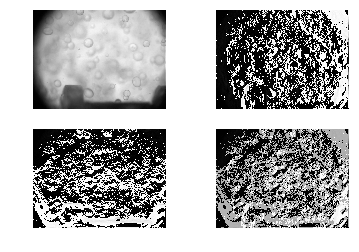

In [8]:
# x方向的Sobel算子
suanzi_x = np.array([[-1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])

# y方向的Sobel算子
suanzi_y = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]])

# 打开图像并转化成灰度图像
image = Image.open(r"E:\zhouhan\420V100Q4\420V100Q401\420V100Q401_0001.jpg").convert("L")

# 转化成图像矩阵
image_array = np.array(image)

# 得到x方向矩阵
image_x = imconv(image_array,suanzi_x)

# 得到y方向矩阵
image_y = imconv(image_array,suanzi_y)

# 得到梯度矩阵
image_xy = np.sqrt(image_x**2+image_y**2)
# 梯度矩阵统一到0-255
image_xy = (255.0/image_xy.max())*image_xy

# 绘出图像
plt.subplot(2,2,1)
plt.imshow(image_array,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(image_x,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(image_y,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(image_xy,cmap=cm.gray)
plt.axis("off")
plt.show()

上方：左图为原图像，右图为x方向导数图像

下方：左图为y方向导数图像，右图为梯度图像

从图中看出，比较Prewitt算子和Sobel算子，Sobel算子稍微减少了一点噪声，但噪声还是比较多的。

- 近似二阶导数的Laplace算子：
    - Laplace算子
$\begin{matrix}
     0 & 1 & 0 \\
     1 & -4 & 1 \\
     0 & 1 & 0 \\
\end{matrix}$
    - Laplace的一种拓展算子
$\begin{matrix}
     0 & 1 & 0 \\
     1 & -4 & 1 \\
     0 & 1 & 0 \\
\end{matrix}$

我们运用scipy库中signal模块的convolve()方法来计算图像卷积。  
convolve()的第一个参数是原图像矩阵，第二个参数为卷积算子，然后指定关键字参数mode="same"(输出矩阵大小和原图像矩阵相同)。

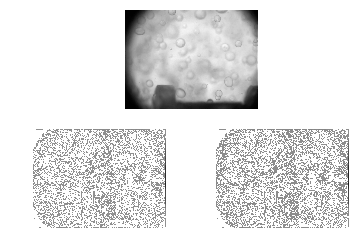

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal as signal     # 导入sicpy的signal模块

# Laplace算子
suanzi1 = np.array([[0, 1, 0],  
                    [1,-4, 1],
                    [0, 1, 0]])

# Laplace扩展算子
suanzi2 = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])

# 打开图像并转化成灰度图像
image = Image.open(r"E:\zhouhan\420V100Q4\420V100Q401\420V100Q401_0001.jpg").convert("L")
image_array = np.array(image)

# 利用signal的convolve计算卷积
image_suanzi1 = signal.convolve2d(image_array,suanzi1,mode="same")
image_suanzi2 = signal.convolve2d(image_array,suanzi2,mode="same")

# 将卷积结果转化成0~255
image_suanzi1 = (image_suanzi1/float(image_suanzi1.max()))*255
image_suanzi2 = (image_suanzi2/float(image_suanzi2.max()))*255

# 为了使看清边缘检测结果，将大于灰度平均值的灰度变成255(白色)
image_suanzi1[image_suanzi1>image_suanzi1.mean()] = 255
image_suanzi2[image_suanzi2>image_suanzi2.mean()] = 255

# 显示图像
plt.subplot(2,1,1)
plt.imshow(image_array,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(image_suanzi1,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(image_suanzi2,cmap=cm.gray)
plt.axis("off")
plt.show()

其中上方为原图像

下方：左边为Laplace算子结果，右边为Laplace扩展算子结果

从结果可以看出，laplace算子似乎比前面两个算子（prewitt算子和Sobel算子）要好一些，噪声减少了，但还是比较多。

而Laplace扩展算子的结果看上去比Laplace的结果少一些噪声。

### 降噪后进行边缘检测 
首先用标准差为5的5*5高斯算子对图像进行平滑处理，然后利用Laplace的扩展算子对图像进行边缘检测。

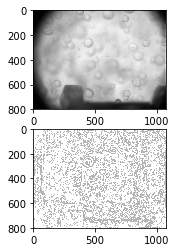

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal as signal

# 生成高斯算子的函数
def func(x,y,sigma=1):
    return 100*(1/(2*np.pi*sigma))*np.exp(-((x-2)**2+(y-2)**2)/(2.0*sigma**2))

# 生成标准差为5的5*5高斯算子
suanzi1 = np.fromfunction(func,(5,5),sigma=5)

# Laplace扩展算子
suanzi2 = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])

# 打开图像并转化成灰度图像
image = Image.open(r"E:\zhouhan\420V100Q4\420V100Q401\420V100Q401_0001.jpg").convert("L")
image_array = np.array(image)

# 利用生成的高斯算子与原图像进行卷积对图像进行平滑处理
image_blur = signal.convolve2d(image_array, suanzi1, mode="same")

# 对平滑后的图像进行边缘检测
image2 = signal.convolve2d(image_blur, suanzi2, mode="same")

# 结果转化到0-255
image2 = (image2/float(image2.max()))*255

# 将大于灰度平均值的灰度值变成255（白色），便于观察边缘
image2[image2>image2.mean()] = 255

# 显示图像
plt.subplot(2,1,1)
plt.imshow(image_array,cmap=cm.gray)
# plt.axis("off")
plt.subplot(2,1,2)
plt.imshow(image2,cmap=cm.gray)
# plt.axis("off")
plt.show()

从图中可以看出，经过降噪处理后，边缘效果较为明显。

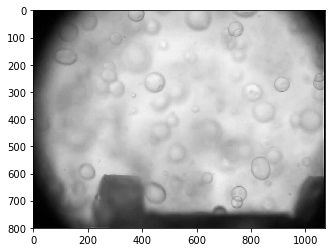

In [29]:
image = Image.open(r"E:\zhouhan\420V100Q4\420V100Q401\420V100Q401_0001.jpg").convert("L")
image_array = np.array(image)
# image_array.max()
image_array = (image_array/float(image_array.max()))*255
plt.imshow(image_array,cmap=cm.gray)
plt.show()

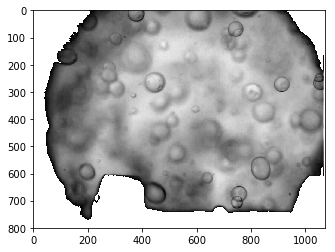

In [30]:
# 将大于某个的灰度值变成255（白色），便于观察边缘
image_array[image_array<120] = 255
plt.imshow(image_array,cmap=cm.gray)
plt.show()